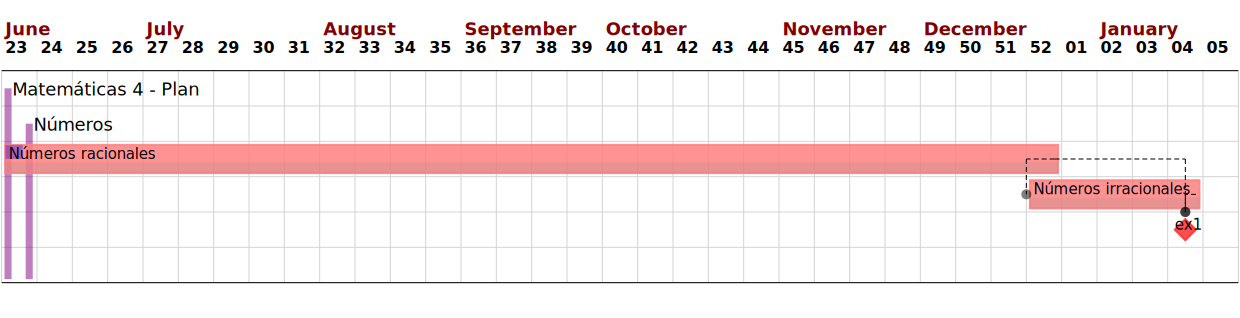

In [3]:
# https://pypi.org/project/python-gantt/
import datetime
from datetime import timedelta, date
import gantt

gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0.001,  font_family="Verdana")

gantt
hoy = datetime.date.today()
inicio = hoy
# inicio = datetime.date(2018, 9, 12)

inicio_vacas = date(inicio.year, inicio.month, inicio.day) + timedelta(days=10)  # start date
vacaciones = 180  # end date

for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

p = gantt.Project(name='Matemáticas 4 - Plan', color='#FFFF40')
p1 = gantt.Project(name='Números', color='#FFFF40')

t1 = gantt.Task(name='Números racionales',start = inicio, duration=20, color="#FF8080")
t2 = gantt.Task(name='Números irracionales',  depends_of = t1, duration=20, color="#FF8080")
ms1 = gantt.Milestone(name='ex1', depends_of=[t1, t2])


p1.add_task(t1)
p1.add_task(t2)
p1.add_task(ms1)
p.add_task(p1)
p.svg_dependencies(p1)
# p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_WEEKLY_SCALE)

q = gantt.Project(name='Matemáticas 4 - Real', color='#FFFF40')

rt1 = gantt.Task(name='Números racionales',start = inicio, duration=t1.duration , color="#FF8080")
q.add_task(rt1)

s = gantt.Project(name='Matemáticas 4', color='#FFFF40')
s.add_task(p)
s.add_task(q)

#s.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_WEEKLY_SCALE)
#s.make_svg_for_tasks(filename='prueba.svg')

p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_WEEKLY_SCALE, title_align_on_left=False)


from IPython.core.display import SVG

SVG(filename='prueba.svg')




In [35]:
gantt.add_vacations?

In [128]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import datetime
import gantt

# Change font default
gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0, font_family="Verdana")

# Add vacations for everyone
gantt.add_vacations(datetime.date(2014, 12, 25))
gantt.add_vacations(datetime.date(2015, 1, 1))
gantt.add_vacations(datetime.date(2015, 1, 13))

# Create two resources
rANO = gantt.Resource('ANO')
rJLS = gantt.Resource('JLS')

# Add vacations for one lucky resource
rANO.add_vacations(
    dfrom=datetime.date(2014, 12, 29),
    dto=datetime.date(2015, 1, 4)
    )
rANO.add_vacations(
    dfrom=datetime.date(2015, 1, 6),
    dto=datetime.date(2015, 1, 8)
    )

# Test if this resource is  avalaible for some dates
print(rANO.is_available(datetime.date(2015, 1, 5)))
print(rANO.is_available(datetime.date(2015, 1, 8)))
print(rANO.is_available(datetime.date(2015, 1, 6)))
print(rANO.is_available(datetime.date(2015, 1, 2)))
print(rANO.is_available(datetime.date(2015, 1, 1)))


# Create some tasks
t1 = gantt.Task(name='tache1', start=datetime.date(2014, 12, 25), duration=4, percent_done=44, resources=[rANO], color="#FF8080")
t2 = gantt.Task(name='tache2', start=datetime.date(2014, 12, 28), duration=6, resources=[rJLS])
t7 = gantt.Task(name='tache7', start=datetime.date(2014, 12, 28), duration=5, percent_done=50)
t3 = gantt.Task(name='tache3', start=datetime.date(2014, 12, 25), duration=4, depends_of=[t1, t7, t2], resources=[rJLS])
t4 = gantt.Task(name='tache4', start=datetime.date(2015, 1, 1), duration=4, depends_of=t1, resources=[rJLS])
t5 = gantt.Task(name='tache5', start=datetime.date(2014, 12, 23), duration=3)
t6 = gantt.Task(name='tache6', start=datetime.date(2014, 12, 25), duration=4, depends_of=t7, resources=[rANO])
t8 = gantt.Task(name='tache8', start=datetime.date(2014, 12, 25), duration=4, depends_of=t7, resources=[rANO, rJLS])


# Create a project
p1 = gantt.Project(name='Projet 1')

# Add tasks to this project
p1.add_task(t1)
p1.add_task(t7)
p1.add_task(t2)
p1.add_task(t3)
p1.add_task(t5)
p1.add_task(t8)



# Create another project
p2 = gantt.Project(name='Projet 2', color='#FFFF40')

# Add tasks to this project
p2.add_task(t2)
p2.add_task(t4)


# Create another project
p = gantt.Project(name='Gantt')
# wich contains the first two projects
# and a single task
p.add_task(p1)
p.add_task(p2)
p.add_task(t6)


# Test cases for milestones
# Create another project
ptcm = gantt.Project(name='Test case for milestones')

tcm11 = gantt.Task(name='tcm11', start=datetime.date(2014, 12, 25), duration=4)
tcm12 = gantt.Task(name='tcm12', start=datetime.date(2014, 12, 26), duration=5)
ms1 = gantt.Milestone(name=' ', depends_of=[tcm11, tcm12])
tcm21 = gantt.Task(name='tcm21', start=datetime.date(2014, 12, 30), duration=4, depends_of=[ms1])
tcm22 = gantt.Task(name='tcm22', start=datetime.date(2014, 12, 30), duration=6, depends_of=[ms1])
ms2 = gantt.Milestone(name='MS2', depends_of=[ms1, tcm21, tcm22])
tcm31 = gantt.Task(name='tcm31', start=datetime.date(2014, 12, 30), duration=6, depends_of=[ms2])
ms3 = gantt.Milestone(name='MS3', depends_of=[ms1])


ptcm.add_task(tcm11)
ptcm.add_task(tcm12)
ptcm.add_task(ms1)
ptcm.add_task(tcm21)
ptcm.add_task(tcm22)
ptcm.add_task(ms2)
ptcm.add_task(tcm31)
ptcm.add_task(ms3)


p.add_task(ptcm)


##########################$ MAKE DRAW ###############
p.make_svg_for_tasks(filename='test_full.svg', today=datetime.date(2014, 12, 31), start=datetime.date(2014,8, 22), end=datetime.date(2015, 1, 14))
p.make_svg_for_tasks(filename='test_full2.svg', today=datetime.date(2014, 12, 31))
p.make_svg_for_tasks(filename='test.svg', today=datetime.date(2014, 12, 31), start=datetime.date(2015, 1, 3), end=datetime.date(2015, 1, 6))
p1.make_svg_for_tasks(filename='test_p1.svg', today=datetime.date(2014, 12, 31))
p2.make_svg_for_tasks(filename='test_p2.svg', today=datetime.date(2014, 12, 31))
p.make_svg_for_resources(filename='test_resources.svg', today=datetime.date(2014, 12, 31), resources=[rANO, rJLS])
p.make_svg_for_tasks(filename='test_weekly.svg', today=datetime.date(2014, 12, 31), scale=gantt.DRAW_WITH_WEEKLY_SCALE)
##########################$ /MAKE DRAW ###############


True
False
False
False
False
ANO 3
JLS 4
